In [2]:
%%capture
%run merging_data.ipynb

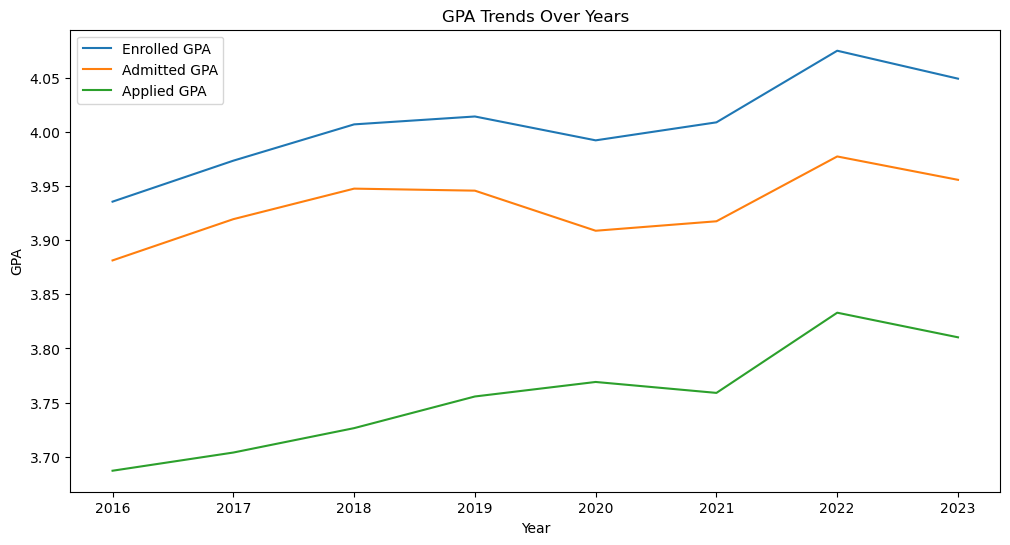

In [3]:
#concat gpa dfs, filter dfs for only necessary data, change get adm/enrolled/applied a

gpa_all_years = pd.concat(gpa.values(), keys=gpa.keys(), names=['Year'])
gpa_filtered = gpa_all_years[['School', 'Measure Names', 'Measure Values']].reset_index()
gpa_pivot = gpa_filtered.pivot_table(index=['Year', 'School'], columns='Measure Names', values='Measure Values').reset_index()
gpa_annual_avg = gpa_pivot.groupby('Year').mean(numeric_only=True).reset_index()

plt.figure(figsize=(12, 6))

plt.plot(gpa_annual_avg['Year'], gpa_annual_avg['Enrl GPA'], label='Enrolled GPA')
plt.plot(gpa_annual_avg['Year'], gpa_annual_avg['Adm GPA'], label='Admitted GPA')
plt.plot(gpa_annual_avg['Year'], gpa_annual_avg['App GPA'], label='Applied GPA')

plt.xlabel('Year')
plt.ylabel('GPA')
plt.title('GPA Trends Over Years')
plt.legend()
plt.show()



We definitely see an upward trend in the least seven years, but is it a statistically significant increase? Let assess the signifcance by fitting the following regressions.

$$
\text{adm\_gpa} = \beta_0 + \beta_1\text{year}
$$

$$
\text{applied\_gpa} = \beta_0 + \beta_1\text{year}
$$

$$
\text{enrolled\_gpa} = \beta_0 + \beta_1\text{year}
$$

In [4]:
gpa_annual_avg['Year'] = gpa_annual_avg['Year'].astype(int)

# Prepare the independent variable (years) with an intercept
X = sm.add_constant(gpa_annual_avg['Year'])

# Dependent variables 
y_enrl = gpa_annual_avg['Enrl GPA']
y_adm = gpa_annual_avg['Adm GPA']
y_app = gpa_annual_avg['App GPA']

#Enrolled GPA model
model_enrl = sm.OLS(y_enrl, X).fit()

#Admitted GPA model
model_adm = sm.OLS(y_adm, X).fit()

#Applied GPA model
model_app = sm.OLS(y_app, X).fit()

# model summaries
print("Enrolled GPA Model Summary:")
print(model_enrl.summary())

print("\nAdmitted GPA Model Summary:")
print(model_adm.summary())

print("\nApplied GPA Model Summary:")
print(model_app.summary())

Enrolled GPA Model Summary:
                            OLS Regression Results                            
Dep. Variable:               Enrl GPA   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     19.38
Date:                Sat, 08 Jun 2024   Prob (F-statistic):            0.00456
Time:                        22:48:58   Log-Likelihood:                 20.138
No. Observations:                   8   AIC:                            -36.28
Df Residuals:                       6   BIC:                            -36.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.9151   

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


We can see that the gpa of those enrolled and those who applied does 
increase significantly (at the 95% significance level). But the gpa of 
those who were admitted has not increased significantly (at the 95% 
significance level). What do we make of this? Come back to this later.

#### Enrolled GPA coefficient interpretation:

For each additional year the gpa of students who enrolled into the UC system increases, on average, by 0.0153 gpa points.


#### Accepted GPA coefficient interpretation:
For each additional year the gpa of students who accepted into the UC system increases, on average, by 0.0081 gpa points.

#### Applied GPA coefficient interpretation:
For each additional year the gpa of students who applied the UC system increases, on average, by 0.0193 gpa points.


